In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df = df
ds = df.T.describe().T

In [2]:
ds

,count,mean,std,min,25%,50%,75%,max
1992,3650.0,33312.107476,200630.901553,-717071.175466,-102740.398364,29674.931050,167441.838695,817505.608159
1993,3650.0,41861.859541,98398.356203,-321586.023683,-26628.302213,43001.976658,108296.577923,395586.505068
1994,3650.0,39493.304941,140369.925240,-450827.613097,-57436.397393,41396.781369,137261.713785,490091.665037
1995,3650.0,47743.550969,69781.185469,-189865.963265,1774.555612,49404.322978,94164.333867,320826.888044


## EASIEST OPTION
 Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

#### Prepare data: Calculater mean, sdt and 95% confidence interval

In [3]:
mean = ds['mean'].to_list()
std = ds['std'].to_list()

print("mean: ", mean)
print('std: ', std)

confidence = []
for i in range(len(std)):
    confidence.append(1.96*(std[i])/math.sqrt(len(df.columns)))

print("confidence: ", confidence)

mean:  [33312.10747554438, 41861.8595410734, 39493.304941398885, 47743.55096926708]
std:  [200630.90155251988, 98398.3562033422, 140369.9252401649, 69781.18546914424]
confidence:  [6508.897969970322, 3192.254313689031, 4553.902287088237, 2263.8517443103765]


#### Get color map

In [5]:
def colorForBar(mean, threshold, confidence):
    if (mean - confidence) < threshold and (mean + confidence) >= threshold:
        return 'white'

    if mean < threshold:
        return 'blue'

    if mean > threshold:
        return 'red'

colors = []
threshold = 42000
for i in range(len(mean)):
    colors.append(colorForBar(mean[i], threshold, confidence[i]))

print(colors)

['blue', 'white', 'white', 'red']


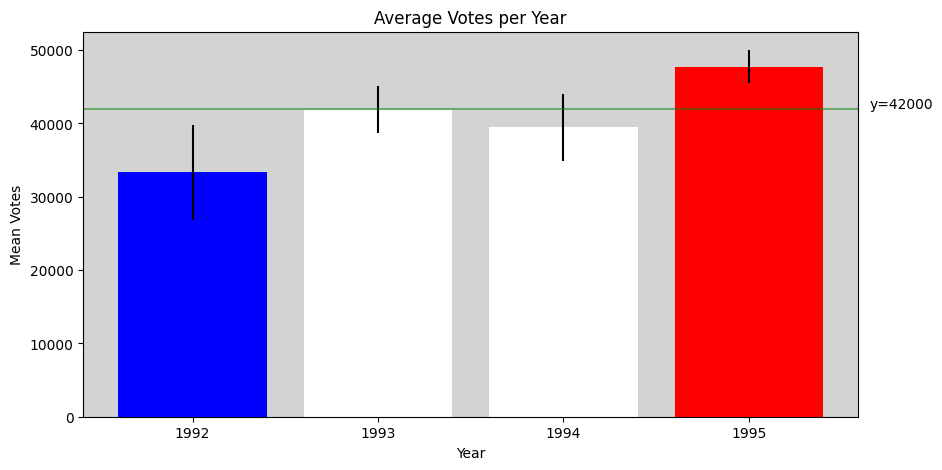

In [8]:
def plot_bar(mean, confidence, threshold, colors):
    x = ['1992', '1993', '1994', '1995']

    plt.figure(figsize=(10, 5))
    plt.bar(x, mean, yerr=confidence, align='center', color=colors)
    plt.axhline(y=threshold, color = 'green', alpha=0.5)

    plt.text(3.65, threshold, 'y=%d' %threshold)
    plt.xticks(x)
    plt.xlabel('Year')
    plt.ylabel("Mean Votes")
    plt.title('Average Votes per Year')
    ax = plt.gca()
    ax.set_facecolor('Lightgrey')

plot_bar(mean, confidence, threshold, colors)

### EVEN HARDER OPTION
 Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.
#### Prepare data

C:\Users\minhh\AppData\Local\Temp\ipykernel_7044\4194703922.py:29: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.norm.interval(alpha=0.95, loc=mu, scale=se)
C:\Users\minhh\AppData\Local\Temp\ipykernel_7044\4194703922.py:64: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cpick, orientation="vertical")  # "horizontal"


11

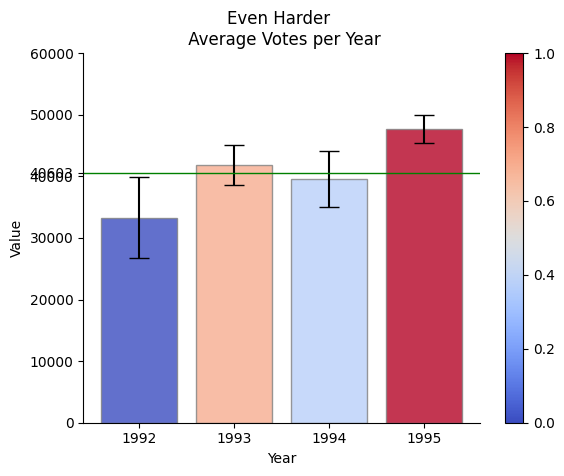

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# Get the means and standard deviations
df_mean = df.mean(axis=1)
df_std = df.std(axis=1)

n = df.shape[1]

# y default
mean = np.mean(df_mean.values)
y = mean

# Compute the 95% confidence intervals
yerr = df_std / np.sqrt(n) * st.norm.ppf(1 - 0.05 / 2)
conf_ints = [
    st.norm.interval(alpha=0.95, loc=mu, scale=se)
    for mu, se in zip(df_mean, df_std / np.sqrt(n))
    ]
# Compute the probablility of the mean > y for each column
def compute_probs(y, conf_int):
    if y < np.min(conf_int):
        result = 1.0
    elif y > np.max(conf_int):
        result = 0.0
    else:
        result = (np.max(conf_int) - y) / (np.max(conf_int) - np.min(conf_int))
    return result


# Compute probabilities
probs = [compute_probs(y, ci) for ci in conf_ints]

# Setup the colormap
cc = ['seismic', 'bwr', 'coolwarm']
cmap = cm.get_cmap(cc[2])
cpick = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])
print(cpick)
# Setup the plot
plt.figure()
bars = plt.bar(range(len(df)),
               df_mean,
#                width=1,
               edgecolor='gray',
               yerr=yerr,
               alpha=0.8,
               color=cpick.to_rgba(probs),
               capsize=7)

# Add the colorbar
cbar = plt.colorbar(cpick, orientation="vertical")  # "horizontal"

# Turn off some plot rectangle spines
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

# Add the horizontal line
hoz_line = plt.axhline(y=y, color='green', linewidth=1)

# Set ticks and labels
plt.title('Even Harder \n Average Votes per Year')

plt.xlabel('Year')
plt.ylabel('Value')

plt.xticks(range(len(df)), df.index)
yt_o = plt.gca().get_yticks()
yt = np.append(yt_o, y)
plt.gca().set_yticks(yt)
#y_text = plt.text(1.5, 55000, 'y = %d' % y, bbox=dict(fc='white', ec='k'))

# Add interactivity
def onclick(event):
    y = event.ydata
    hoz_line.set_ydata(event.ydata)
    yt = np.append(yt_o, y)
    plt.gca().set_yticks(yt)

    probs = [compute_probs(y, ci) for ci in conf_ints]
    for i in range(len(df)):
        bars[i].set_color(cpick.to_rgba(probs[i]))
        bars[i].set_edgecolor('gray')


plt.gcf().canvas.mpl_connect('button_press_event', onclick)